In [1]:
import pandas as pd
from multiprocessing import Pool
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams["svg.fonttype"] = "none"  # Ensures the text is not converted to paths
pd.set_option('display.max_columns', None)

In [2]:
paris_naive_hybrids_1 = pd.read_csv('Data/PARIS/hybrids/mES_1.hybrids.gc.annotated.tsv', sep='\t')
paris_naive_hybrids_2 = pd.read_csv('Data/PARIS/hybrids/mES_2.hybrids.gc.annotated.tsv', sep='\t')
paris_naive_hybrids_3 = pd.read_csv('Data/PARIS/hybrids/mES_3.hybrids.gc.annotated.tsv', sep='\t')
paris_naive_hybrids = pd.concat([paris_naive_hybrids_1, paris_naive_hybrids_2, paris_naive_hybrids_3])
del paris_naive_hybrids_1, paris_naive_hybrids_2, paris_naive_hybrids_3

paris_naive_hybrids = paris_naive_hybrids[~((paris_naive_hybrids['R_biotype'].str.contains('rRNA|tRNA')) | (paris_naive_hybrids['L_biotype'].str.contains('rRNA|tRNA')))]
paris_naive_hybrids_inter = paris_naive_hybrids[paris_naive_hybrids['type'] == 'intragenic'].reset_index(drop=True)

del paris_naive_hybrids
paris_naive_hybrids_inter["L_gene_id"] = paris_naive_hybrids_inter["L_gene_id"].apply(lambda x: x.split('.')[0])
paris_naive_hybrids_inter["R_gene_id"] = paris_naive_hybrids_inter["R_gene_id"].apply(lambda x: x.split('.')[0])

paris_naive_hybrids_inter

/tmp/ipykernel_938902/2768536428.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  paris_naive_hybrids_1 = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/semi_oops_project/Data/PARIS/hybrids/mES_1.hybrids.gc.annotated.tsv', sep='\t')
/tmp/ipykernel_938902/2768536428.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  paris_naive_hybrids_2 = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/semi_oops_project/Data/PARIS/hybrids/mES_2.hybrids.gc.annotated.tsv', sep='\t')
/tmp/ipykernel_938902/2768536428.py:3: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  paris_naive_hybrids_3 = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/semi_oops_project/Data/PARIS/hybrids/mES_3.hybrids.gc.annotated.tsv', sep='\t')


,name,orientation,type,hybrid_selection,total_count,cluster_hybrid_count,cluster,L_seqnames,L_read_start,L_read_end,L_start,L_end,L_width,L_strand,L_genomic_seqnames,L_genomic_start,L_genomic_end,L_genomic_strand,R_seqnames,R_read_start,R_read_end,R_start,R_end,R_width,R_strand,R_genomic_seqnames,R_genomic_start,R_genomic_end,R_genomic_strand,L_region,L_gene_id,L_gene_name,L_biotype,R_region,R_gene_id,R_gene_name,R_biotype
0,SRR2814766.15670947,genomic,intragenic,single,16,5.0,C002,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,1,39,25987,26025,39,+,chr7,101885401,101885439,+,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,40,60,27583,27603,21,+,chr7,101886997,101887017,+,CDS,ENSMUSG00000030990,Pgap2,mRNA,UTR3,ENSMUSG00000030990,Pgap2,mRNA
1,SRR2814766.19894135,genomic,intragenic,single,16,5.0,C002,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,2,39,25988,26025,38,+,chr7,101885402,101885439,+,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,40,60,27583,27603,21,+,chr7,101886997,101887017,+,CDS,ENSMUSG00000030990,Pgap2,mRNA,UTR3,ENSMUSG00000030990,Pgap2,mRNA
2,SRR2814766.2085628,genomic,intragenic,single,16,5.0,C003,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,2,22,25896,25916,21,+,chr7,101885310,101885330,+,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,23,51,25953,25981,29,+,chr7,101885367,101885395,+,CDS,ENSMUSG00000030990,Pgap2,mRNA,CDS,ENSMUSG00000030990,Pgap2,mRNA
3,SRR2814766.22806760,genomic,intragenic,single,16,5.0,C003,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,2,22,25896,25916,21,+,chr7,101885310,101885330,+,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,23,51,25953,25981,29,+,chr7,101885367,101885395,+,CDS,ENSMUSG00000030990,Pgap2,mRNA,CDS,ENSMUSG00000030990,Pgap2,mRNA
4,SRR2814766.25991753,genomic,intragenic,single,16,5.0,C002,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,1,39,25987,26025,39,+,chr7,101885401,101885439,+,00R_Pgap2_Pgap2:ENSMUSG00000030990.19_ENSMUSG0...,40,60,27583,27603,21,+,chr7,101886997,101887017,+,CDS,ENSMUSG00000030990,Pgap2,mRNA,UTR3,ENSMUSG00000030990,Pgap2,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620641,SRR2814768.6360000,reverse,intragenic,single,29,10.0,C001,mt-Nd5:ENSMUSG00000064367.1,26,53,367,394,28,+,chrM,12108,12135,+,mt-Nd5:ENSMUSG00000064367.1,4,25,526,547,22,+,chrM,12267,12288,+,CDS,ENSMUSG00000064367,mt-Nd5,mRNA,CDS,ENSMUSG00000064367,mt-Nd5,mRNA
620642,SRR2814768.70949215,genomic,intragenic,single,29,8.0,C002,mt-Nd5:ENSMUSG00000064367.1,2,30,454,482,29,+,chrM,12195,12223,+,mt-Nd5:ENSMUSG00000064367.1,31,57,499,525,27,+,chrM,12240,12266,+,CDS,ENSMUSG00000064367,mt-Nd5,mRNA,CDS,ENSMUSG00000064367,mt-Nd5,mRNA
620643,SRR2814768.72090438,reverse,intragenic,single,29,10.0,C001,mt-Nd5:ENSMUSG00000064367.1,26,53,367,394,28,+,chrM,12108,12135,+,mt-Nd5:ENSMUSG00000064367.1,4,25,526,547,22,+,chrM,12267,12288,+,CDS,ENSMUSG00000064367,mt-Nd5,mRNA,CDS,ENSMUSG00000064367,mt-Nd5,mRNA
620644,SRR2814768.72857914,genomic,intragenic,single,29,10.0,C001,mt-Nd5:ENSMUSG00000064367.1,2,25,370,393,24,+,chrM,12111,12134,+,mt-Nd5:ENSMUSG00000064367.1,26,48,523,545,23,+,chrM,12264,12286,+,CDS,ENSMUSG00000064367,mt-Nd5,mRNA,CDS,ENSMUSG00000064367,mt-Nd5,mRNA


In [3]:
paris_intra_data_L = paris_naive_hybrids_inter[['L_genomic_seqnames', 'L_genomic_start', 'L_genomic_end', 'L_genomic_strand', 'L_gene_id', 'L_region']]
paris_intra_data_R = paris_naive_hybrids_inter[['R_genomic_seqnames', 'R_genomic_start', 'R_genomic_end', 'R_genomic_strand', 'R_gene_id', 'R_region']]
paris_intra_data_L.columns = ['Chromosome', 'Start', 'End', 'Strand', 'gene_id', 'region']
paris_intra_data_R.columns = ['Chromosome', 'Start', 'End', 'Strand', 'gene_id', 'region']
paris_intra_data = pd.concat([paris_intra_data_L, paris_intra_data_R])
paris_intra_data

,Chromosome,Start,End,Strand,gene_id,region
0,chr7,101885401,101885439,+,ENSMUSG00000030990,CDS
1,chr7,101885402,101885439,+,ENSMUSG00000030990,CDS
2,chr7,101885310,101885330,+,ENSMUSG00000030990,CDS
3,chr7,101885310,101885330,+,ENSMUSG00000030990,CDS
4,chr7,101885401,101885439,+,ENSMUSG00000030990,CDS
...,...,...,...,...,...,...
620641,chrM,12267,12288,+,ENSMUSG00000064367,CDS
620642,chrM,12240,12266,+,ENSMUSG00000064367,CDS
620643,chrM,12267,12288,+,ENSMUSG00000064367,CDS
620644,chrM,12264,12286,+,ENSMUSG00000064367,CDS


In [4]:
lenghts = pd.read_csv('genomes/genome_m39/gencode.vM27.annotation_with_feature_lengths.tsv', sep='\t')
lenghts = lenghts[['transcript_id', 'cds_length', '3utr_length', '5utr_length']]
lenghts

,transcript_id,cds_length,3utr_length,5utr_length
0,ENSMUST00000000001.5,1062.0,2059.0,141.0
1,ENSMUST00000000003.14,522.0,240.0,140.0
2,ENSMUST00000000010.9,750.0,1739.0,85.0
3,ENSMUST00000000028.14,1698.0,132.0,313.0
4,ENSMUST00000000033.12,540.0,3053.0,115.0
...,...,...,...,...
67153,ENSMUST00010126732.2,350.0,0.0,27.0
67154,ENSMUST00010181659.1,834.0,56.0,53.0
67155,ENSMUST00010181660.1,483.0,3.0,0.0
67156,ENSMUST00020183129.1,391.0,914.0,0.0


In [18]:
masterfile = pd.read_csv('Data/machine_learning_input_prep/all_expressed_transcripts_with_fasta_naive:clip_collapsed.bed', sep="\t")
clusters = pd.read_csv('Results/machine_learning_results/cluster_assignment_file/sequence::global_iclip:paris_intramol:postar3_joined_clusters.tsv', sep="\t")
masterfile = pd.merge(masterfile, clusters, on="transcript_id", how="left")
masterfile_with_lengths = pd.merge(masterfile, lenghts, left_on="transcript_id", right_on="transcript_id", how="inner")
masterfile_with_lengths["gene_id"] = masterfile_with_lengths["gene_id"].apply(lambda x: x.split('.')[0])
masterfile_with_lengths

,gene_id,transcript_id,strand,gene_name,feature_length,sequence,global_iclip,sequence_length,cluster0,cluster1,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,Cluster,cds_length,3utr_length,5utr_length
0,ENSMUSG00000000001,ENSMUST00000000001.5,-,Gnai3,259,CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...,"0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",3262,False,False,False,False,False,False,31.163420,30.960366,16.155487,1370.666667,2922.000000,740.140667,NaN,1062.0,2059.0,141.0
1,ENSMUSG00000020875,ENSMUST00000000010.9,+,Hoxb9,602,GGTCCGTGTGCCACCTTTTCCCTGCTTGGGCGCCGCGGCGCGAGCG...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2574,False,False,False,False,False,False,0.041456,0.037552,0.476991,1.333333,2.666667,14.666667,NaN,750.0,1739.0,85.0
2,ENSMUSG00000000028,ENSMUST00000000028.14,-,Cdc45,169,TGGAAACACATTCAAATAATGTGTGACTGAATTTACTTTATGTCTA...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2143,False,False,False,False,False,False,13.999242,16.831587,21.890544,349.666333,871.333000,575.334000,NaN,1698.0,132.0,313.0
3,ENSMUSG00000000078,ENSMUST00000000080.8,+,Klf6,361,GAGGGGGGAGGCTGGCAGCGGAGCTTTGAATAGGGAAGTTTTGCAG...,"0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...",4225,False,False,False,False,False,True,23.747248,24.678761,9.409482,1257.667000,2633.333333,490.929333,NaN,954.0,3114.0,157.0
4,ENSMUSG00000000088,ENSMUST00000000090.8,+,Cox5a,137,CTCACACCGGCTTCTCGTCAGCCTCAGCCAGTGCGCTGTGGTCGCC...,"9,1,3,1,3,5,0,0,2,1,3,7,2,4,8,3,20,7,3,0,1,0,3...",645,False,False,False,False,False,False,39.196652,48.808133,119.122907,238.666667,619.997000,758.655667,NaN,438.0,158.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10700,ENSMUSG00000118665,ENSMUST00000239512.1,-,Lin54,134,CGGCGGTGGAATGGCGCTGGGCGCGTGATTTTGAACAAACCCGGGT...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4451,False,False,False,False,False,True,8.714442,10.936347,6.445710,509.666667,1361.667000,368.000000,NaN,2247.0,2038.0,166.0
10701,ENSMUSG00000118667,ENSMUST00000239525.1,-,Ahnak2,186,GTCACAACCCGGCTGCCCGCGGCAGCACCGGGCAGCGAGGCCGTGG...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",11349,True,False,False,True,True,False,1.445733,1.445551,0.684518,232.000000,506.666667,116.666667,NaN,10503.0,715.0,131.0
10702,ENSMUSG00000118668,ENSMUST00000239527.1,-,Rps6ka4,144,CACCAGGAAGCACCCGCCCCGGCCGGAGCCGCCATGTAACCGGCGC...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",3140,True,False,False,True,False,False,2.109276,2.358641,1.332907,57.136333,141.780333,58.279333,NaN,2319.0,732.0,89.0
10703,ENSMUSG00000118669,ENSMUST00000239538.1,+,Arvcf,124,GCCTGCACTGGAGGGAGTCAGTAGAGCCGGAGCGGCCGGAGCGCCC...,"0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,...",3829,False,False,False,False,False,False,14.573663,20.966120,18.162342,410.667333,1219.333667,492.340000,NaN,2676.0,1050.0,103.0


In [19]:
paris_intra_data_merged = pd.merge(paris_intra_data, masterfile_with_lengths, on="gene_id")
paris_intra_data_merged_grouped = paris_intra_data_merged.groupby(['gene_id', 'region']).size().reset_index(name='counts')
paris_intra_data_merged_grouped_merged_with_masterfile = pd.merge(paris_intra_data_merged_grouped, masterfile_with_lengths[["gene_id", "cds_length",	"3utr_length",	"5utr_length", "sequence_length", "Cluster", 	"cluster0",	"cluster1",	"smoops_naive",	"smoops_epi",	"smoops_diff",	"control_common"]], on="gene_id")
paris_intra_data_merged_grouped_merged_with_masterfile

,gene_id,region,counts,cds_length,3utr_length,5utr_length,sequence_length,Cluster,cluster0,cluster1,smoops_naive,smoops_epi,smoops_diff,control_common
0,ENSMUSG00000000001,CDS,29,1062.0,2059.0,141.0,3262,NaN,False,False,False,False,False,False
1,ENSMUSG00000000001,UTR3,71,1062.0,2059.0,141.0,3262,NaN,False,False,False,False,False,False
2,ENSMUSG00000000001,UTR5,12,1062.0,2059.0,141.0,3262,NaN,False,False,False,False,False,False
3,ENSMUSG00000000001,intron,20,1062.0,2059.0,141.0,3262,NaN,False,False,False,False,False,False
4,ENSMUSG00000000028,CDS,60,1698.0,132.0,313.0,2143,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,ENSMUSG00000118669,intron,26,2676.0,1050.0,103.0,3829,NaN,False,False,False,False,False,False
28599,ENSMUSG00000118669,ncRNA,14,2676.0,1050.0,103.0,3829,NaN,False,False,False,False,False,False
28600,ENSMUSG00000118671,CDS,83,10374.0,825.0,1133.0,12332,0.0,True,False,True,True,True,False
28601,ENSMUSG00000118671,UTR3,4,10374.0,825.0,1133.0,12332,0.0,True,False,True,True,True,False


In [22]:
def parse_expression_data_gene(path):
    
    expression_data_gene= pd.read_csv(path, sep="\t").reset_index(drop=True)

    triplets = [
        ('control_diff', 'control_diff_1', 'control_diff_2', 'control_diff_3'),
        ('control_epiSC', 'control_epiSC_1', 'control_epiSC_2', 'control_epiSC_3'),
        ('control_naive', 'control_naive_1', 'control_naive_2', 'control_naive_3'),
        ('oops_diff', 'oops_diff_1', 'oops_diff_2', 'placeholder'),
        ('oops_epiSC', 'oops_epiSC_1', 'oops_epiSC_2', 'oops_epiSC_3'),
        ('oops_naive', 'oops_naive_1', 'oops_naive_2', 'oops_naive_3'),
        ('semi_diff', 'semi_diff_1', 'semi_diff_2', 'semi_diff_3'),
        ('semi_epiSC', 'semi_epiSC_1', 'semi_epiSC_2', 'semi_epiSC_3'),
        ('semi_naive', 'semi_naive_1', 'semi_naive_2', 'semi_naive_3'),
    ]

    expression_data_gene_mean = expression_data_gene[['gene_name',	'gene_id']].copy()

    for triplet in triplets:
        name, col1, col2, col3 = triplet
        if col3 == 'placeholder':
            expression_data_gene_mean[f'{name}_mean_tpm'] = expression_data_gene[[col1, col2]].mean(axis=1)
        else:
            expression_data_gene_mean[f'{name}_mean_tpm'] = expression_data_gene[[col1, col2, col3]].mean(axis=1)
        
    return expression_data_gene_mean

def add_expression_to_final_data(df, expression_data_gene):
    
    expression_data_gene_subset = expression_data_gene[['gene_id',	'semi_diff_mean_tpm',	'semi_epiSC_mean_tpm',	'semi_naive_mean_tpm']]
    expression_data_gene_subset["gene_id"] = expression_data_gene_subset["gene_id"].apply(lambda x: x.split('.')[0])
    df = pd.merge(df, expression_data_gene_subset, on='gene_id')
    
    return df

expression_data_gene_path = 'Data/salmon_count_tables/salmon.merged.gene_tpm.tsv'
expression_data_gene = parse_expression_data_gene(expression_data_gene_path)


In [23]:
full_data = add_expression_to_final_data(paris_intra_data_merged_grouped_merged_with_masterfile, expression_data_gene)
full_data.sort_values(by='semi_naive_mean_tpm', ascending=True)

/tmp/ipykernel_938902/4242835592.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression_data_gene_subset["gene_id"] = expression_data_gene_subset["gene_id"].apply(lambda x: x.split('.')[0])


,gene_id,region,counts,cds_length,3utr_length,5utr_length,sequence_length,Cluster,cluster0,cluster1,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm
4078,ENSMUSG00000019852,intron,34,6510.0,7745.0,324.0,14579,NaN,True,False,False,True,True,False,1.070603,1.126957,0.046698
4077,ENSMUSG00000019852,CDS,38,6510.0,7745.0,324.0,14579,NaN,True,False,False,True,True,False,1.070603,1.126957,0.046698
2732,ENSMUSG00000014030,UTR3,10,1173.0,6752.0,79.0,8004,NaN,False,False,False,False,False,False,0.008221,0.023114,0.089322
2733,ENSMUSG00000014030,intron,8,1173.0,6752.0,79.0,8004,NaN,False,False,False,False,False,False,0.008221,0.023114,0.089322
23314,ENSMUSG00000047496,intron,26,609.0,7305.0,492.0,8406,NaN,False,False,False,False,False,False,0.038021,0.070434,0.091584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25490,ENSMUSG00000057841,CDS,177,405.0,57.0,55.0,517,NaN,False,False,False,False,False,False,1516.979951,1974.606236,2741.052650
19243,ENSMUSG00000037742,intron,30,1386.0,288.0,120.0,1794,NaN,False,False,False,False,False,False,3452.642022,4007.214011,3871.887291
19240,ENSMUSG00000037742,CDS,4999,1386.0,288.0,120.0,1794,NaN,False,False,False,False,False,False,3452.642022,4007.214011,3871.887291
19241,ENSMUSG00000037742,UTR3,20,1386.0,288.0,120.0,1794,NaN,False,False,False,False,False,False,3452.642022,4007.214011,3871.887291


In [41]:
df_results_0 = full_data[full_data['Cluster'] != 1]
df_results_0 = df_results_0[(df_results_0["region"] == "CDS") | (df_results_0["region"] == "UTR3") | (df_results_0["region"] == "UTR5")]

for index, row in df_results_0.iterrows():
    if row["region"] == "CDS":
        if row["cds_length"] == 0:
            df_results_0.at[index, "normalized_counts_length"] = 0
        else:
            df_results_0.at[index, "normalized_counts_length"] = row["counts"] / (row["cds_length"] * row["semi_naive_mean_tpm"])
    elif row["region"] == "UTR3":
        if row["3utr_length"] == 0:
            df_results_0.at[index, "normalized_counts_length"] = 0
        else:
            df_results_0.at[index, "normalized_counts_length"] = row["counts"] / (row["3utr_length"] * row["semi_naive_mean_tpm"])
    elif row["region"] == "UTR5":
        if row["5utr_length"] == 0:
            df_results_0.at[index, "normalized_counts_length"] = 0
        else:
         df_results_0.at[index, "normalized_counts_length"] = row["counts"] / (row["5utr_length"] * row["semi_naive_mean_tpm"])

df_results_0

,gene_id,region,counts,cds_length,3utr_length,5utr_length,sequence_length,Cluster,cluster0,cluster1,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,normalized_counts_length
0,ENSMUSG00000000001,CDS,29,1062.0,2059.0,141.0,3262,NaN,False,False,False,False,False,False,31.163420,30.960366,16.155487,0.000211
1,ENSMUSG00000000001,UTR3,71,1062.0,2059.0,141.0,3262,NaN,False,False,False,False,False,False,31.163420,30.960366,16.155487,0.000267
2,ENSMUSG00000000001,UTR5,12,1062.0,2059.0,141.0,3262,NaN,False,False,False,False,False,False,31.163420,30.960366,16.155487,0.000658
4,ENSMUSG00000000028,CDS,60,1698.0,132.0,313.0,2143,NaN,False,False,False,False,False,False,13.999242,16.831587,21.890544,0.000202
6,ENSMUSG00000000056,CDS,18,1386.0,2937.0,72.0,4395,NaN,False,False,False,False,False,False,7.450390,8.939471,2.809453,0.000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28596,ENSMUSG00000118669,CDS,109,2676.0,1050.0,103.0,3829,NaN,False,False,False,False,False,False,14.573663,20.966120,18.162342,0.000280
28597,ENSMUSG00000118669,UTR3,35,2676.0,1050.0,103.0,3829,NaN,False,False,False,False,False,False,14.573663,20.966120,18.162342,0.000229
28600,ENSMUSG00000118671,CDS,83,10374.0,825.0,1133.0,12332,0.0,True,False,True,True,True,False,1.105965,1.334899,4.507509,0.000222
28601,ENSMUSG00000118671,UTR3,4,10374.0,825.0,1133.0,12332,0.0,True,False,True,True,True,False,1.105965,1.334899,4.507509,0.000134


In [42]:
df_results_1 = full_data[full_data['Cluster'] != 1]
df_results_1 = df_results_1.groupby(['gene_id']).agg({'counts': 'sum', 'semi_naive_mean_tpm': 'first', "smoops_naive": "first", "sequence_length": "first"}).reset_index()
df_results_1["region"] = "All Trancripts"
df_results_1["normalized_counts_length"] = df_results_1["counts"] / (df_results_1["sequence_length"] * df_results_1["semi_naive_mean_tpm"])
df_results_1

,gene_id,counts,semi_naive_mean_tpm,smoops_naive,sequence_length,region,normalized_counts_length
0,ENSMUSG00000000001,132,16.155487,False,3262,All Trancripts,0.000313
1,ENSMUSG00000000028,116,21.890544,False,2143,All Trancripts,0.000309
2,ENSMUSG00000000056,44,2.809453,False,4395,All Trancripts,0.000445
3,ENSMUSG00000000078,48,9.409482,False,4225,All Trancripts,0.000151
4,ENSMUSG00000000088,100,119.122907,False,645,All Trancripts,0.000163
...,...,...,...,...,...,...,...
9612,ENSMUSG00000118665,64,6.445710,False,4451,All Trancripts,0.000279
9613,ENSMUSG00000118667,64,0.684518,False,11349,All Trancripts,0.001030
9614,ENSMUSG00000118668,18,1.332907,False,3140,All Trancripts,0.000538
9615,ENSMUSG00000118669,184,18.162342,False,3829,All Trancripts,0.000331


/tmp/ipykernel_938902/3220681716.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='region',
/tmp/ipykernel_938902/3220681716.py:42: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='region',
/tmp/ipykernel_938902/3220681716.py:42: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x='region',


[False  True]
['UTR5', 'CDS', 'UTR3']
0.000730997691491156
0.0008911083207091074
T-Test for UTR5: t=-0.8946221664538812, p=0.3721319104484244
Mann-Whitney  for UTR5: t=287411.0, p=0.002003664091348497
0.0005191264032576528
0.0009628826244212224
T-Test for CDS: t=-2.9086858625505547, p=0.0038811729978466734
Mann-Whitney  for CDS: t=777314.0, p=4.3281307492775006e-30
0.0008451263847260411
0.0006311946423928449
T-Test for UTR3: t=0.7782654579742062, p=0.4366034426920521
Mann-Whitney  for UTR3: t=767211.0, p=1.9958918676950363e-06


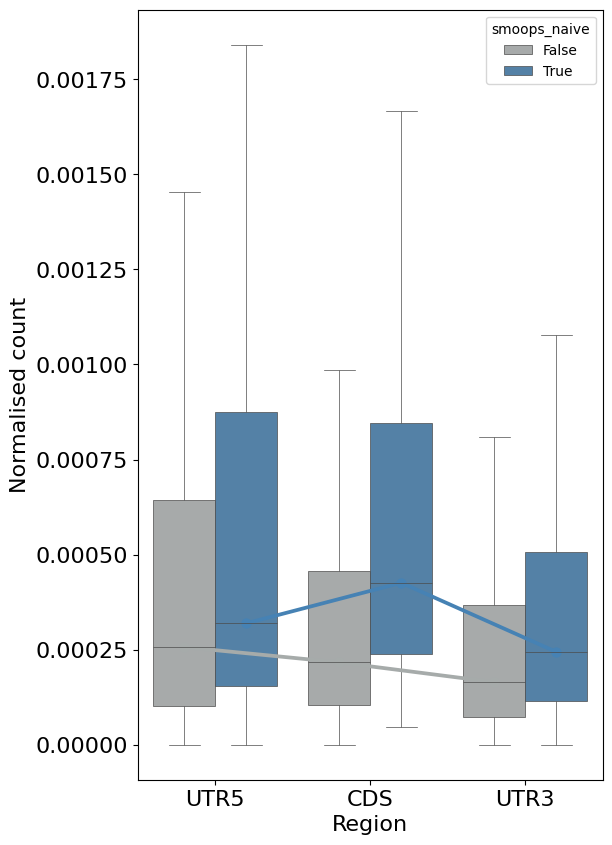

[False  True]
['All Trancripts']
0.0006638826157591134
0.0013157953531690897
T-Test for All Trancripts: t=-3.778495301591681, p=0.0001869729327523404
Mann-Whitney  for All Trancripts: t=897732.0, p=1.508855767796406e-35


/tmp/ipykernel_938902/3220681716.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='region',
/tmp/ipykernel_938902/3220681716.py:42: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='region',
/tmp/ipykernel_938902/3220681716.py:42: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x='region',


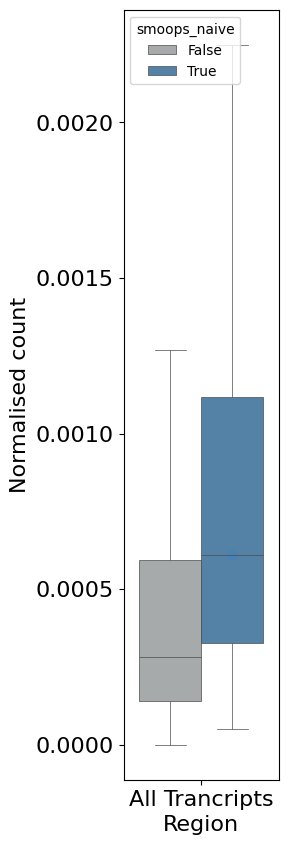

In [43]:
def add_ttest_annotations(ax, df, group_col, value_col, hue_col, unique_regions):
    hue_levels = df[hue_col].unique()
    print(hue_levels)
    print(unique_regions)
    for region in unique_regions:
        region_data = df[df[group_col] == region]
        if len(hue_levels) == 2:  # Perform t-test only if exactly two groups exist
            group1 = region_data[region_data[hue_col] == hue_levels[0]][value_col]
            print(np.mean(group1))
            group2 = region_data[region_data[hue_col] == hue_levels[1]][value_col]
            print(np.mean(group2))
            if len(group1) > 1 and len(group2) > 1:  # Ensure sufficient data
                t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit', equal_var=False, alternative='two-sided')
                print(f'T-Test for {region}: t={t_stat}, p={p_val}')
                t_stat, p_val = stats.mannwhitneyu(group1, group2)
                print(f'Mann-Whitney  for {region}: t={t_stat}, p={p_val}')

def plot_intra_per_gene_and_region(df_results_protein_coding, name):
    palette = ['#A6ABAA', '#4682B4']

    if name == "cluster 0":
        fig, ax = plt.subplots(1, 1, figsize=(6, 10))
        order = ["UTR5", "CDS", "UTR3"]
    else:
        fig, ax = plt.subplots(1, 1, figsize=(2, 10))
        order = ["All Trancripts"]

    sns.boxplot(x='region', 
                y='normalized_counts_length', 
                hue='smoops_naive', 
                data=df_results_protein_coding, 
                ax=ax, 
                dodge=True, 
                showfliers=False, 
                linewidth=0.5, 
                palette=palette,
                order=order
                )

    sns.pointplot(x='region', 
                y='normalized_counts_length', 
                hue='smoops_naive', 
                data=df_results_protein_coding, 
                palette=palette,
                ax=ax, 
                dodge=0.4,    
                estimator="median",
                join=True,  
                markers="o", 
                scale=1, 
                ci=None,
                order=order
                )     
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], title="smoops_naive")
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel('Region', fontsize=16)
    ax.set_ylabel('Normalised count', fontsize=16)

    add_ttest_annotations(ax, df_results_protein_coding, 'region', 'normalized_counts_length', 'smoops_naive', order)

    #plt.ylim(0, 0.0003)

    # plt.savefig(f'Results/Figure_IV_All_Non_SmOOPs/intra_per_gene_{name}.svg', bbox_inches='tight')
    
    plt.show()

plot_intra_per_gene_and_region(df_results_0, "cluster 0")
plot_intra_per_gene_and_region(df_results_1, "cluster 1")